# 문제 풀의 유의사항

`1` 반드시 답안을 작성하라는 셀안에 코드를 작성하기

`2` 변수명이 제시된 경우 반드시 해당 변수명을 사용하기

`3`  데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 VOC를 제기한 고객의 해지여부를 예측하고 결과를 분석하세요.

# 데이터 로드

In [1]:
import pandas as pd

df = pd.read_csv("/content/voc_data.csv")

# 데이터 구성 확인

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_trt_perd_itg_cd             10000 non-null  object
 1   voc_prod_sbt_id                 10000 non-null  int64 
 2   voc_wjt_sorc_id                 10000 non-null  int64 
 3   voc_type_itg_cd                 10000 non-null  int64 
 4   voc_sttus_itg_cd                10000 non-null  int64 
 5   voc_trt_reslt_itg_cd            10000 non-null  object
 6   cust_clas_itg_cd                10000 non-null  object
 7   bprod_sbt_id                    10000 non-null  int64 
 8   age_itg_cd                      10000 non-null  object
 9   cont_sttus_itg_cd               10000 non-null  object
 10  new_date                        10000 non-null  int64 
 11  opn_nfl_chg_date                10000 non-null  int64 
 12  cust_dtl_ctg_itg_cd             10000 non-null 

In [3]:
df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,9.907267e+08,1578.29170,10008.52360,10002.043400,8.838173e+08,1.744283e+07,1.744505e+07,20001.074200,0.008800,10002.656800,7.004469e+07,193.88010
std,1.005780e+08,1078.63717,1.57927,0.314843,3.214229e+08,6.849207e+06,6.850077e+06,0.262109,0.103555,6.576864,3.863802e+07,6970.03853
min,-9.980000e+02,126.00000,10003.00000,10002.000000,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.00000
25%,1.000782e+09,360.00000,10009.00000,10002.000000,1.000003e+09,2.008053e+07,2.008123e+07,20001.000000,0.000000,10001.000000,2.021102e+07,0.00000
50%,1.001028e+09,2056.00000,10009.00000,10002.000000,1.000749e+09,2.014121e+07,2.015031e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
75%,1.001036e+09,2153.00000,10009.00000,10002.000000,1.001044e+09,2.018010e+07,2.018032e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
max,1.001079e+09,3856.00000,10017.00000,10005.000000,1.001078e+09,2.020041e+07,2.020041e+07,20002.000000,3.000000,10038.000000,9.999123e+07,367991.00000


## `voc_trt_perd_itg_cd` 변수의 고유값 count

In [4]:
df["voc_trt_perd_itg_cd"].value_counts()

_        5422
10000    4283
10001     163
10002      58
10003      25
10004      16
10005      10
10006       6
10008       3
10009       3
10016       2
10011       2
10012       2
10007       2
10014       1
10013       1
10015       1
Name: voc_trt_perd_itg_cd, dtype: int64

In [5]:
df["voc_trt_perd_itg_cd"].value_counts(normalize = True)

_        0.5422
10000    0.4283
10001    0.0163
10002    0.0058
10003    0.0025
10004    0.0016
10005    0.0010
10006    0.0006
10008    0.0003
10009    0.0003
10016    0.0002
10011    0.0002
10012    0.0002
10007    0.0002
10014    0.0001
10013    0.0001
10015    0.0001
Name: voc_trt_perd_itg_cd, dtype: float64

# 불필요한 변수 삭제

In [6]:
d_c = ["voc_trt_perd_itg_cd", "voc_trt_reslt_itg_cd", "oos_cause_type_itg_cd", "engt_cperd_type_itg_cd",
            "engt_tgt_div_itg_cd", "fclt_oos_yn", "voc_mis_pbls_yn", "new_date", "opn_nfl_chg_date", 'cont_fns_pam_date']

df1 = df.drop(d_c, axis = 1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_prod_sbt_id                 10000 non-null  int64 
 1   voc_wjt_sorc_id                 10000 non-null  int64 
 2   voc_type_itg_cd                 10000 non-null  int64 
 3   voc_sttus_itg_cd                10000 non-null  int64 
 4   cust_clas_itg_cd                10000 non-null  object
 5   bprod_sbt_id                    10000 non-null  int64 
 6   age_itg_cd                      10000 non-null  object
 7   cont_sttus_itg_cd               10000 non-null  object
 8   cust_dtl_ctg_itg_cd             10000 non-null  object
 9   voc_trt_degr_div_itg_cd         10000 non-null  int64 
 10  voc_dupl_tmscnt                 10000 non-null  int64 
 11  voc_trt_need_time_itg_cd        10000 non-null  int64 
 12  cust_snsry_base_conf_need_time  10000 non-null 

# 데이터 결측치 처리

`1` DataFrame replace 함수를 사용해서 모든 컬럼에 대해 `_`값을 null로 변경

`2` Null 표현 : np.nan

`3` `inplace = True` 사용

`4` 컬럼별 `Null` count

In [7]:
import numpy as np

df1.replace("_", np.nan,inplace = True)

In [8]:
df1.isna().sum() ## 이 부분 count로 하면 안됌

voc_prod_sbt_id                      0
voc_wjt_sorc_id                      0
voc_type_itg_cd                      0
voc_sttus_itg_cd                     0
cust_clas_itg_cd                  1934
bprod_sbt_id                         0
age_itg_cd                        2129
cont_sttus_itg_cd                 1168
cust_dtl_ctg_itg_cd               1168
voc_trt_degr_div_itg_cd              0
voc_dupl_tmscnt                      0
voc_trt_need_time_itg_cd             0
cust_snsry_base_conf_need_time       0
trm_yn                               0
dtype: int64

# `cust_clas_itf_cd`의 결측치를 최빈값으로 변경

In [9]:
m = df1.cust_clas_itg_cd.mode()[0] ## 인덱스 넘버를 명시해주어야함

df1.cust_clas_itg_cd.fillna(m, inplace = True)

In [10]:
df1.cust_clas_itg_cd.isna().sum()

0

#  `age_itg_cd`의 결측치를 중앙값으로 변경하고 데이터 타입을 정수로 변경

In [11]:
m2 = df1.age_itg_cd.median()

df1.age_itg_cd.fillna(m2, inplace = True)

In [12]:
df1.age_itg_cd.isna().sum()

0

In [13]:
df1.age_itg_cd = df1.age_itg_cd.astype(int)

# `cont_sttus_itg_cd`의 null값과 `cust_dtl_ctg_itg_cd`의 null 값을 최빈값으로 변경

In [14]:
m3 = df1.cont_sttus_itg_cd.mode()[0]
m4 = df1.cust_dtl_ctg_itg_cd.mode()[0]

df1.cont_sttus_itg_cd.fillna(m3, inplace = True)
df1.cust_dtl_ctg_itg_cd.fillna(m4, inplace = True)

df1.cont_sttus_itg_cd.isna().sum()
df1.cust_dtl_ctg_itg_cd.isna().sum()

0

# 라벨 인코딩, 원핫 인코딩($\star\star\star$)

`Object` 데이터 타입을 가지는 열들을 선택하여 `cat_cols`라는 변수에 저장

In [15]:
cat_cols  = df1.select_dtypes("O")
#cat_cols.head()

## 라벨인코딩

 cat_cols 데이터프레임에서 `cust_clas_itg_cd` 열의 범주형 데이터를 숫자로 인코딩하고, 그 결과를 `le_cust_clas_itg_cd` 열에 저장

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols["le_cust_clas_itg_cd"] = le.fit_transform(cat_cols["cust_clas_itg_cd"])

In [17]:
cat_cols.head()

,cust_clas_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,trm_yn,le_cust_clas_itg_cd
0,F,10001,10003,N,0
1,G,10001,10002,N,1
2,G,10001,10003,N,1
3,L,10001,90024,N,5
4,G,10001,90024,N,1


# 범주형 컬럼 one_hot_encoding

`1` 범주형 컬럼을 찾아 cat_columns에 저장

`2` Pandas의 get_dummies 함수 사용

`3` 대상 데이터프레임 : df1

`4` columns = `cat_columns`

`5`  drop_first = True

`6` 해당 전처리가 반영된 결과를 `df1` 데이터 프레임에 저장

In [18]:
cat_columns = df1.select_dtypes("O").columns.values.tolist()

df1 = pd.get_dummies(df1, columns = cat_columns, drop_first = True)

# x. y 데이터 분리

`1` 대상 데이터프레임 : df1

`2` 훈련 데이터셋 label : y_train, 훈련 데이터셋 Feature : X_train

`3` 테스트 데이터셋 label : y_test, 테스트 데이터셋 Feature : X_test

`4` X, y, test_size=0.2, stratify=y, random_state=0

`5` 사이킷런 train_test_split 함수 사용

In [19]:
target = "trm_yn_Y"

X = df1.drop(target, axis = 1)
y = df1[target]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

# 데이터 스케일링

`1` 사이킷런의 MinMaxScaler() 함수 사용

`2` MinMaxScaler 객체를 초기화하고 mms 변수에 저장

`3` 훈련 데이터 ’X_train’을 최소-최대 스케일링하여 변환, fit_transform 메서드 적용

`4` 테스트 데이터 ’X_test’를 훈련 데이터에 맞춰 스케일링, transform 메서드 적용

In [20]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#  로지스틱 모델 설계

`1` 규제강도 C : 1.0으로 설정

`2` 계산에 사용할 작업수 `max_iter` : 2000으로 설정

`3` 훈련 데이터셋 학습

`4` X_test에 대한 예측 정확도를 계산

In [21]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1.0, max_iter = 2000)

logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)

from sklearn.metrics import *

accuracy_score(y_test, logit_pred)

0.978

# 결과 시각화

`-` `heatmap`과 `classification_report`를 사용

* `cf_matrix` 변수에 `confusion_matrix` 저장

*  heatmap 옵션 : `annot = True`, `fmt = "d"`

* `y_test`와 `y_pred`를 비교하여 성능지표 출력

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1955
           1       1.00      0.02      0.04        45

    accuracy                           0.98      2000
   macro avg       0.99      0.51      0.52      2000
weighted avg       0.98      0.98      0.97      2000



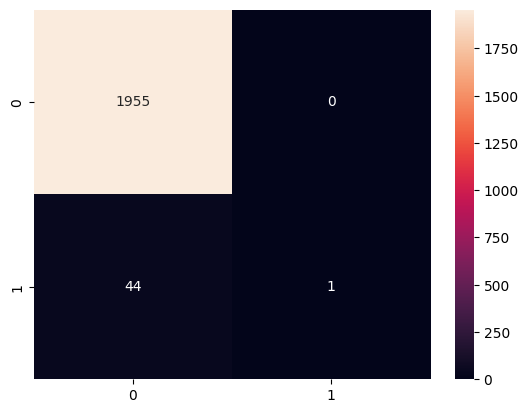

In [22]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, logit_pred)

sns.heatmap(cf_matrix, annot = True, fmt = "d")

print(classification_report(y_test, logit_pred))

# tree 모형 설계

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)

tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

accuracy_score(y_test, tree_pred)

0.9705

# RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10, n_estimators = 100)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

accuracy_score(y_test, rf_pred)

0.978

# XGBoost

In [25]:
from xgboost import XGBClassifier

xg = XGBClassifier(max_depth = 10, n_estimators = 100)

xg.fit(X_train, y_train)

xg_pred =  xg.predict(X_test)


accuracy_score(y_test, xg_pred)

0.974

# lightgbm

In [26]:
import warnings

warnings.filterwarnings("ignore")

In [27]:
from lightgbm import LGBMClassifier

lg = LGBMClassifier(max_depth = 5, n_estimators = 10, verbose = -100)

lgbm =lg.fit(X_train, y_train)

lg_pred = lgbm.predict(X_test)

accuracy_score(y_test, lg_pred)

0.9775

# 딥러닝 모델 설계

`1` Tensoflow의 Sequential() 함수를 사용하여 model로 저장하세요.

`2` 첫번째 Hidden Layer : unit 64, activation=‘relu’, input_shape=(34,) 입력

`3` 두번째 Hidden Layer : unit 32 , activation=‘relu’

`4` 세번째 Hidden Layer : unit 16 , activation=‘relu’

`5` 각 Hidden Layer 마다 Dropout 0.2 비율로 되도록 하세요.

`6` 마지막 Dense에서 ‘sigmoid’ 설정하세요. (0.5 이하이면 정상, 아니면 해지)

`7` 옵티마이저는 adam, 손실함수는 binary_crossentropy를 사용하세요.

`8` EarlyStopping 콜백으로 정해진 epoch 동안 모니터링 지표가 향상되지 않을 때 훈련을 중지하도록 설정하세요 (모니터링 지표 : val_loss)

`9` ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 ‘my_checkpoint.ckpt’ 파일로 저장하세요.(모니터링 지표 : val_loss)

`11` EarlyStopping 객체는 es 변수에 ModelCheckpoint 객체는 mc 변수에 저장해서 활용해 주세요.

`12` 학습정보는 history 변수에 저장하세요.

In [36]:
import tensorflow as tf

from keras.backend import *
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras. callbacks import *

model = Sequential()

model.add(Dense(units = 64, activation  = "relu", input_shape = (34, )))
model.add(Dropout(0.2))

model.add(Dense(units = 32, activation  = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 16, activation  = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(0.01), loss = "binary_crossentropy")

es =  EarlyStopping(monitor = "val_loss", mode  = "min", verbose = 1, patience = 5)
mc = ModelCheckpoint(mode = "min", filepath = "my_checkpoint.ckpt",monitor = "val_loss", save_best_only= True, verbose = 1)

history = model.fit(X_train, y_train, callbacks = [es, mc], epochs = 30,
                                batch_size  = 1024, validation_data = (X_test, y_test), verbose = 1).history

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 0.3841 
Epoch 1: val_loss improved from inf to 0.13571, saving model to my_checkpoint.ckpt
8/8 [==============================] - 3s 215ms/step - loss: 0.3572 - val_loss: 0.1357
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1396
Epoch 2: val_loss did not improve from 0.13571
8/8 [==============================] - 0s 8ms/step - loss: 0.1725 - val_loss: 0.1409
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1794
Epoch 3: val_loss improved from 0.13571 to 0.10512, saving model to my_checkpoint.ckpt
8/8 [==============================] - 1s 117ms/step - loss: 0.1367 - val_loss: 0.1051
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1164
Epoch 4: val_loss improved from 0.10512 to 0.09992, saving model to my_checkpoint.ckpt
8/8 [==============================] - 1s 118ms/step - loss: 0.1232 - val_loss: 0.0999
Epoch 5/30
1/8 [==>...........................] - ETA: 0s

# 결과 시각화

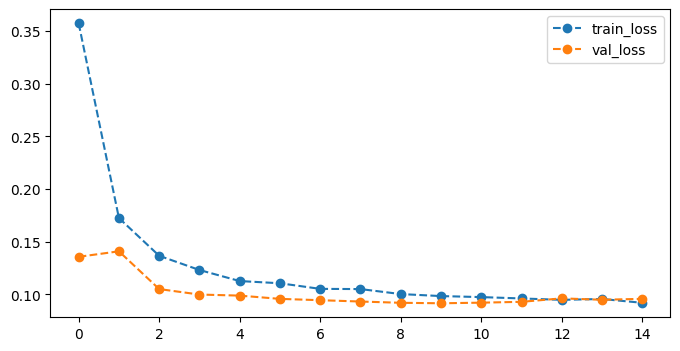

In [39]:
import  matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.plot(history["loss"], "--o", label = "train_loss")
plt.plot(history["val_loss"], "--o", label = "val_loss")
plt.legend()
plt.show()

In [55]:
pred = np.where(model.predict(X_test) > 0.5, 1, 0)

63/63 [==============================] - 0s 3ms/step


[[1955    0]
 [  45    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1955
           1       0.00      0.00      0.00        45

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



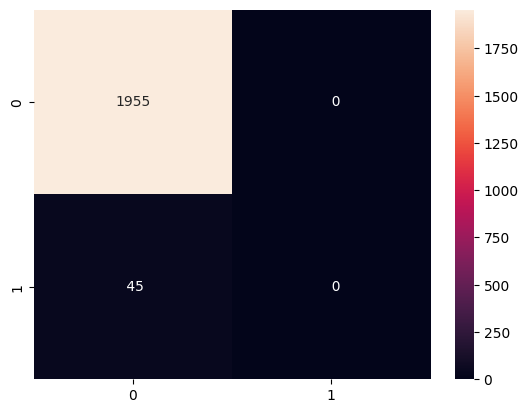

In [56]:
sns.heatmap(confusion_matrix(y_test, pred),
                        annot = True, fmt = "3d")


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
